<a href="https://colab.research.google.com/github/Raja-18/machine_learning/blob/master/6_Feedforward_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                           #for np arrays

import matplotlib.pyplot as plt                              #for ploting
import matplotlib.colors

import pandas as pd                                          #for dataframes

from tqdm import tqdm_notebook                               #for analysing time taken for each epochs

from sklearn.metrics import accuracy_score, mean_squared_error    # for evaluation 
from sklearn.model_selection import train_test_split               # for test and train split
from sklearn.preprocessing import OneHotEncoder                    # for multicalss classification, encoding y
from sklearn.datasets import make_blobs                            # for making costum clustered datasets

In [ ]:
plt.style.use('seaborn')

## Sigmoid neuron with cross entropy loss

In [ ]:
class SigmoidNeuron:
  def __init__(self):
    self.w=None
    self.b=None

  def perceptron(self,x):                                #perceptron model
    return(np.dot(x,self.w.T)+self.b)
  
  def sigmoid(self,x):                                   #sigmoid model
    return(1.0/(1.0+np.exp(-x)))
   
  def grad_w_mse(self,x,y):                              #gradient decent for mean squared error loss (w)
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b_mse(self,x,y):                              #gradient decent for mean squared error loss (b)
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)

  def grad_w_ce(self,x,y):                               #gradient decent for cross entropy loss (w)
    y_pred=self.sigmoid(self.perceptron(x))
    if y==0:
      return y_pred*x
    elif y==1:
      return -1*(1-y_pred)*x
    else:
      raise ValueError("y should be 0 or 1")

  def grad_b_ce(self,x,y):                               #gradient decent for cross entropy loss (b)
    y_pred=self.sigmoid(self.perceptron(x))
    if y==0:
      return y_pred
    elif y==1:
      return -1*(1-y_pred)
    else:
      raise ValueError("y should be 0 or 1")

  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    #initialise w,b
    self.w=np.random.randn(1,X.shape[1])
    self.b=0

    if display_loss:
      loss={}

    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw=0
      db=0
      for x,y in zip(X,Y):
        if loss_fn=="mse":
          dw+=self.grad_w_mse(x,y)
          db+=self.grad_b_mse(x,y)
        elif loss_fn=="ce":
          dw+=self.grad_w_ce(x,y)
          db+=self.grad_b_ce(x,y)
      m=X.shape[1]
      self.w-=learning_rate*dw/m                 #normalising
      self.b-=learning_rate*db/m

      if display_loss:
        y_pred=self.sigmoid(self.perceptron(X))
        if loss_fn=="mse":
          loss[i]=mean_squared_error(Y,y_pred)
        elif loss_fn=="ce":
          loss[i]=log_loss(Y,y_pred)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      if loss_fn=='mse':
        plt.ylabel('Mean Squared Error')
      elif loss_fn=='ce':
        plt.ylabel('Log Loss')
      plt.show()

  def predict(self,x):
    y_pred_list=[]
    for i in x:
      y_pred=self.sigmoid(self.perceptron(i))
      y_pred_list.append(y_pred)
    return np.array(y_pred_list)


In [ ]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])  #color map for sigmoid 

In [ ]:
np.random.seed(0)

In [ ]:
data,labels=make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0) #used to genarate clustered datasets (centers-class)
print(data.shape, labels.shape)                                                 #labels - y  data -x

(1000, 2) (1000,)


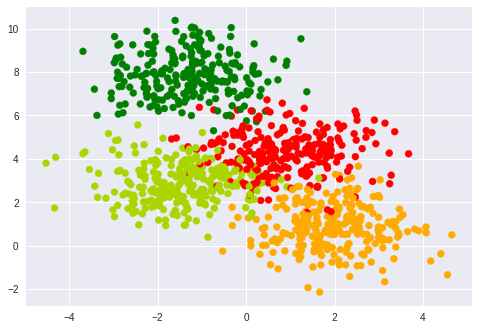

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [ ]:
labels_orig=labels                                                              #making them into binaray class
labels=np.mod(labels_orig,2)

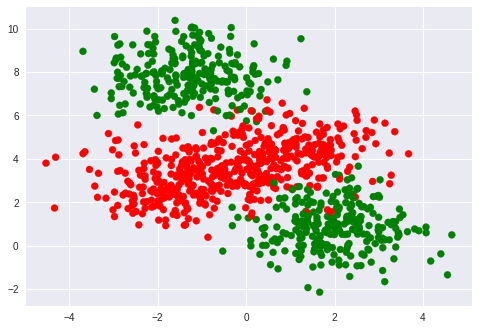

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(data,labels,stratify=labels,random_state=0) #spliting test and train data
print(x_train.shape,x_val.shape)
print(y_train.shape,y_val.shape)

(750, 2) (250, 2)
(750,) (250,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


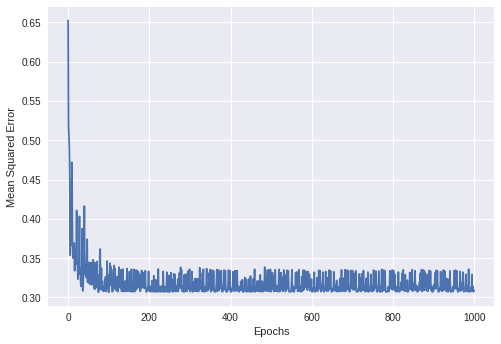

In [ ]:
sn=SigmoidNeuron()
sn.fit(x_train,y_train,epochs=1000,learning_rate=0.5,display_loss=True)

In [ ]:
y_pred_train=sn.predict(x_train)
y_pred_binarised_train=(y_pred_train>=0.5).astype("int").ravel()
y_pred_val=sn.predict(x_val)
y_pred_binarised_val=(y_pred_val>=0.5).astype("int").ravel()
accuracy_train=accuracy_score(y_pred_binarised_train,y_train)
accuracy_val=accuracy_score(y_pred_binarised_val,y_val)

print("training accuracy: ",round(accuracy_train,2))
print("validation accuracy: ",round(accuracy_val,2))

training accuracy:  0.68
validation accuracy:  0.64


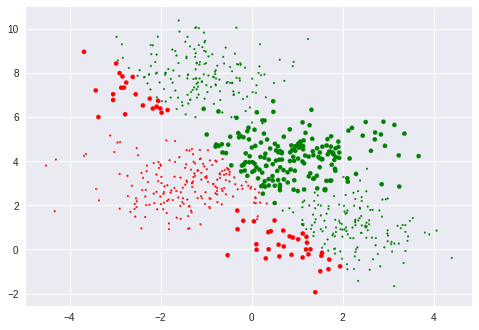

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(y_pred_binarised_train-y_train)+0.2))
plt.show()

### inference:
the performane of single sigmoid neuron with non liearly seperable data is shown above where
1. short dots are correctly predicted and long dots are wrongly predicted
2. colour indicates which class it belongs to (red-0 and green-1)

## FF Network

In [ ]:
class FirstFFNetwork:
  
  def __init__(self):                                              #initialising the parameters
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):                                          #sigmoid model
    return 1.0/(1.0 + np.exp(-x))
    
  def forward_pass(self, x):                                     #feed forward network 
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):                                         #gradient for each parameters
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):    #learning algorithm
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9                       #initialising all with zero (its type is not list, its int) 
      for x, y in zip(X, Y):                                                   
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
        
      m = X.shape[1]                                                            #updating the parameters (normalising with no.of attributes)
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:                                 
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


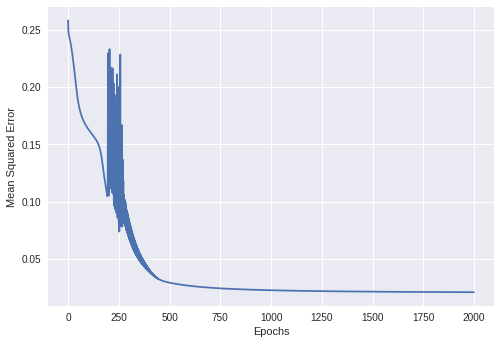

In [ ]:
ffn=FirstFFNetwork()
ffn.fit(x_train,y_train,epochs=2000, learning_rate=.01, display_loss=True)

In [ ]:
y_pred_train=ffn.predict(x_train)                                               #train
y_pred_binarised_train=(y_pred_train>=0.5).astype("int").ravel()                #binarising the predicted y(train)
y_pred_val=ffn.predict(x_val)                                                   #test
y_pred_binarised_val=(y_pred_val>=0.5).astype("int").ravel()                    #binarising the predicted y(test)

accuracy_train=accuracy_score(y_pred_binarised_train,y_train)        
accuracy_val=accuracy_score(y_pred_binarised_val,y_val)

print("training accuracy: ",round(accuracy_train,2))
print("validation accuracy: ",round(accuracy_val,2))

training accuracy:  0.98
validation accuracy:  0.94


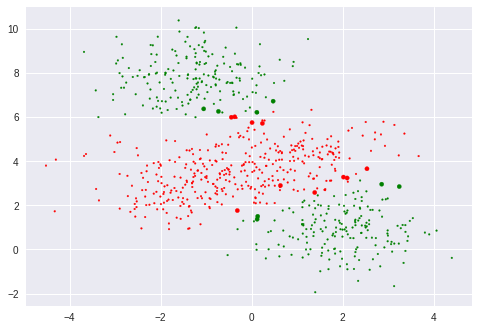

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(y_pred_binarised_train-y_train)+0.2))
plt.show()

## Generic FFN (binary classification)

In [ ]:
class genericFFN:
  
  def __init__(self, n_inputs, hidden_sizes=[2]):
    self.nx = n_inputs                                                          #no of inputs (ex:x1, x2)
    self.ny = 1                                                                 #for binary classification one op neuron is inough 
    self.nh = len(hidden_sizes)                                                 #no of hidden layers
    self.sizes = [self.nx] + hidden_sizes + [self.ny]                           #which gives the overall size of NN L0 to Lnh+1
    
    self.W = {}                                                                 #each layer W's are stored in each i of dictionary
    self.B = {}                                                                 #each layer B's are stored in each i of dictionary 
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])             
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)                                                #transforming into 2d array
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]             #pre activation
      self.H[i+1] = self.sigmoid(self.A[i+1])                                   #activation
    return self.H[self.nh+1]                                                    
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}                                                                    #initilising dw and db not w b
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()  #The squeeze() function is used to remove single-dimensional entries from the shape of an array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


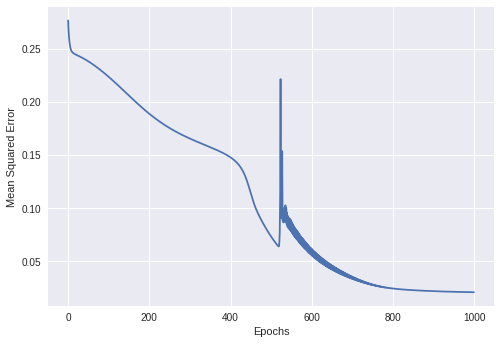

In [ ]:
gffn=genericFFN(2,[2,3])
gffn.fit(x_train,y_train,epochs=1000,learning_rate=.001,display_loss=True)

In [ ]:
y_pred_train=gffn.predict(x_train)
y_pred_binarised_train=(y_pred_train>=0.5).astype("int").ravel()
y_pred_val=gffn.predict(x_val)
y_pred_binarised_val=(y_pred_val>=0.5).astype("int").ravel()
accuracy_train=accuracy_score(y_pred_binarised_train,y_train)
accuracy_val=accuracy_score(y_pred_binarised_val,y_val)

print("training accuracy: ",round(accuracy_train,2))
print("validation accuracy: ",round(accuracy_val,2))

training accuracy:  0.97
validation accuracy:  0.94


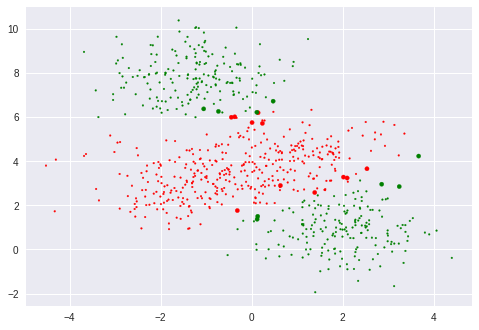

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(y_pred_binarised_train-y_train)+0.2))
plt.show()

In [ ]:
class FFN_MultiClass:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)                                #exponent of each element in x(vector)
    return exps / np.sum(exps)                      #for each element in exps is dividied by sum of total elements in exps

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):                                                    #for binary classifi it will be (self.nh+1)
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]  #at last (before output)
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):                                           #cross entropy loss for display purpose
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(data,labels_orig,stratify=labels_orig,random_state=0) 
print(x_train.shape,x_val.shape,labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [ ]:
enc=OneHotEncoder()
#encodes 0-(1,0,0,0) 1-(0,1,0,0) 2-(0,0,1,0) 3-(0,0,0,1)  
y_oh_train=enc.fit_transform(np.expand_dims(y_train,axis=1)).toarray()
y_oh_val=enc.fit_transform(np.expand_dims(y_val,axis=1)).toarray()
print(y_oh_train.shape,y_oh_val.shape)

(750, 4) (250, 4)


In [ ]:
y_val

array([0, 2, 0, 3, 2, 0, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 0, 2, 3, 3, 1, 0,
       2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 1, 2, 0, 2, 2, 3, 2, 0, 3, 2, 1, 1,
       2, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 0, 0, 3, 3, 1, 2,
       1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 2, 3, 0, 2, 3, 1, 2, 3, 3, 0,
       3, 1, 2, 2, 2, 3, 3, 1, 2, 2, 0, 3, 1, 3, 1, 3, 3, 1, 1, 0, 1, 0,
       1, 0, 3, 3, 2, 3, 3, 2, 1, 1, 3, 3, 1, 1, 3, 2, 2, 2, 3, 0, 2, 1,
       1, 0, 0, 0, 3, 0, 3, 1, 2, 3, 1, 0, 2, 2, 3, 2, 1, 0, 1, 3, 1, 0,
       2, 0, 3, 3, 0, 0, 1, 2, 3, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 1, 2, 1,
       1, 0, 3, 1, 1, 3, 2, 0, 1, 3, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 3, 3,
       1, 0, 1, 3, 0, 0, 1, 0, 1, 2, 1, 3, 0, 2, 0, 1, 3, 0, 2, 3, 2, 3,
       2, 3, 1, 0, 3, 3, 1, 2, 2, 3, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 0, 2, 1, 2, 3])

In [ ]:
y_oh_val

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


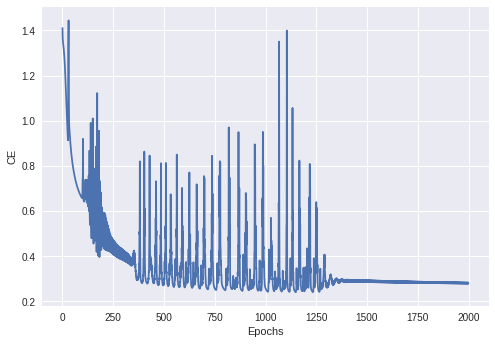

In [ ]:
ffn_multi = FFN_MultiClass(2,4,[2,3])                                           #for 4 class 4 output neuron 
ffn_multi.fit(x_train,y_oh_train,epochs=2000,learning_rate=.005,display_loss=True)

In [ ]:
y_pred_train = ffn_multi.predict(x_train)
y_pred_train = np.argmax(y_pred_train,1)

y_pred_val = ffn_multi.predict(x_val)
y_pred_val = np.argmax(y_pred_val,1)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_val = accuracy_score(y_pred_val, y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.9
Validation accuracy 0.92


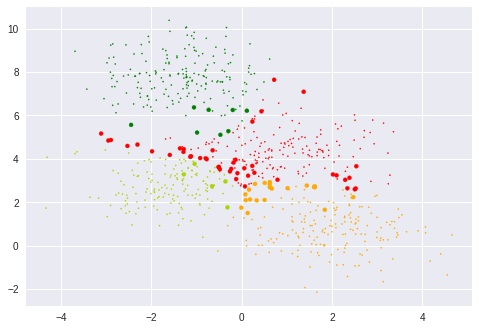

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(y_pred_train-y_train))+.1))
plt.show()